In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Breast_Cancer.csv")
data.head(40)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
5,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive
6,51,White,Married,T1,N1,IIA,Well differentiated,1,Regional,8,Positive,Positive,11,1,54,Alive
7,40,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,30,Positive,Positive,9,1,14,Dead
8,40,White,Divorced,T4,N3,IIIC,Poorly differentiated,3,Regional,103,Positive,Positive,20,18,70,Alive
9,69,White,Married,T4,N3,IIIC,Well differentiated,1,Distant,32,Positive,Positive,21,12,92,Alive


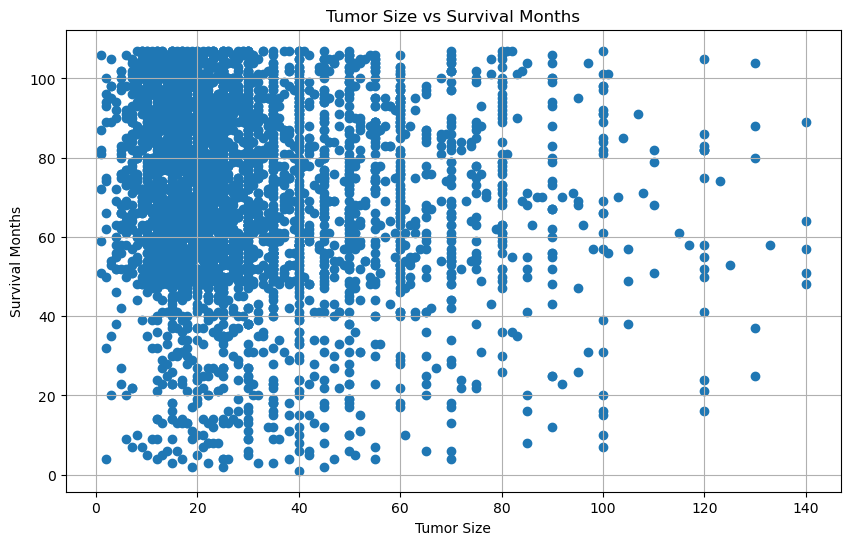

In [28]:

plt.figure(figsize=(10, 6))
plt.scatter(data["Tumor Size"], data["Survival Months"],)
plt.title("Tumor Size vs Survival Months")
plt.xlabel("Tumor Size")
plt.ylabel("Survival Months")
plt.grid(True)
plt.show()


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data["Status"] = label_encoder.fit_transform(data["Status"])  
features=["Tumor Size","Age","Grade","differentiate"]
data_encoded = pd.get_dummies(data[features])
X = data_encoded
y = data["Status"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7788819875776397
Confusion Matrix:
 [[603  82]
 [ 96  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       685
           1       0.23      0.20      0.21       120

    accuracy                           0.78       805
   macro avg       0.54      0.54      0.54       805
weighted avg       0.77      0.78      0.77       805



In [28]:

expected_columns = model.feature_names_in_

input_data = dict.fromkeys(expected_columns, 0)

input_data['Tumor Size'] = float(input("Enter Tumor Size: "))
input_data['Age'] = int(input("Enter Age: "))

stage = input("Enter Cancer Stage (1, 2, 3, or 4): ").strip()
stage_column = f"Stage_{stage}"
if stage_column in input_data:
    input_data[stage_column] = 1
grade = input("Enter Grade (e.g., 1, 2, 3, Grade_ anaplastic; Grade IV): ").strip()
grade_column = f"Grade_{grade}"
if grade_column in input_data:
    input_data[grade_column] = 1
new_patient = pd.DataFrame([input_data], columns=expected_columns)
prediction = model.predict(new_patient)
print("✅ Predicted Status:", "Alive" if prediction[0] == 0 else "Dead")


Enter Tumor Size:  70
Enter Age:  70
Enter Cancer Stage (1, 2, 3, or 4):  4
Enter Grade (e.g., 1, 2, 3, Grade_ anaplastic; Grade IV):  Grade IV


✅ Predicted Status: Dead
